In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clinical_raw_data = pd.read_csv('./clinical.csv')
RNAseq_raw_data = pd.read_csv('./RNAseq_15000_samples.csv')
CNV_raw_data = pd.read_csv('./cnv_15000_rows.csv')
clinical_stages_mapper = clinical_raw_data[['case_barcode','case_gdc_id','clinical_stage']]

In [3]:
clean_data = pd.DataFrame(data=[clinical_raw_data['case_barcode'], clinical_raw_data['clinical_stage']]).T
clean_data.head()

,case_barcode,clinical_stage
0,TCGA-2K-A9WE,NaN
1,TCGA-2Z-A9J9,Stage I
2,TCGA-2Z-A9J5,Stage II
3,TCGA-2Z-A9JG,Stage I
4,TCGA-2Z-A9J3,Stage II


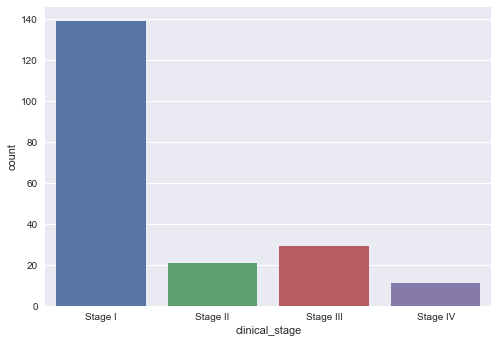

In [4]:
sns.countplot(clean_data['clinical_stage'], order=['Stage I', 'Stage II', 'Stage III', 'Stage IV'])
plt.show()

In [5]:
CNV_raw_stages = CNV_raw_data.merge(clinical_stages_mapper, left_on='case_barcode', right_on='case_barcode')
RNAseq_raw_stages = RNAseq_raw_data.merge(clinical_stages_mapper, left_on='case_barcode', right_on='case_barcode')
indels = CNV_raw_stages[0.2 < abs(CNV_raw_stages['segment_mean'])]
insertions = indels[indels['segment_mean'] > 0]
deletions = indels[indels['segment_mean'] < 0]

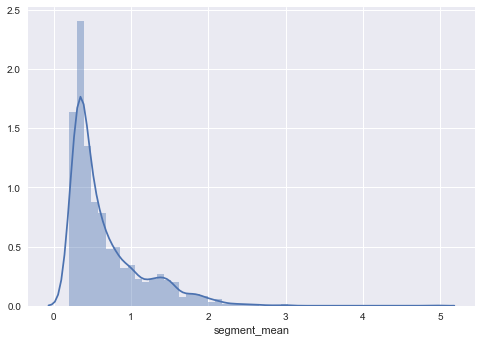

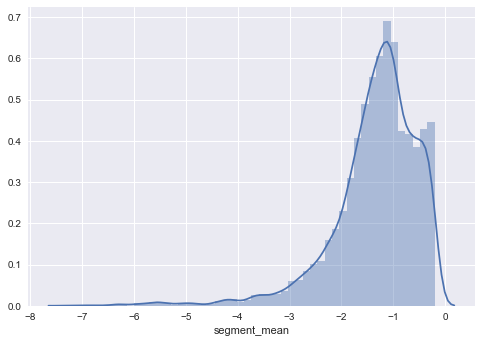

In [6]:
sns.distplot(insertions['segment_mean'])
plt.show()
sns.distplot(deletions['segment_mean'])
plt.show()

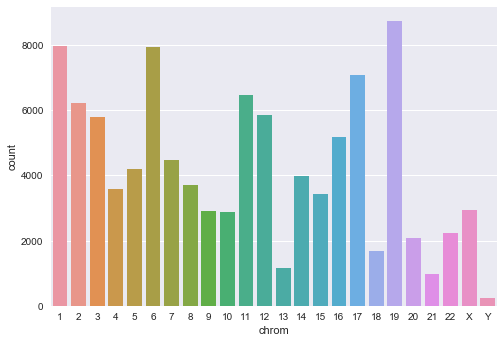

19

In [17]:
import warnings
warnings.simplefilter('ignore')
genes = pd.DataFrame.from_csv('hg19.txt', sep='\t', header=0)
coding_genes = genes[genes['cdsStart'] != genes['cdsEnd']]
coding_genes['chrom'] = coding_genes['chrom'].str.slice(3,5)
coding_genes['chrom'] = coding_genes['chrom'].str.extract('(\d+|[XY])', expand=False)
sns.countplot(coding_genes['chrom'],order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X','Y'])
plt.show()
coding_genes.sort_values(['chrom','cdsStart'], inplace=True)

In [21]:
indels.head()

,project_short_name,case_barcode,sample_barcode,aliquot_barcode,chromosome,start_pos,end_pos,num_probes,segment_mean,platform,case_gdc_id,clinical_stage
4,TCGA-KIRP,TCGA-2K-A9WE,TCGA-2K-A9WE-01A,TCGA-2K-A9WE-01A-11D-A381-01,2,145949919,145949930,2,-2.5383,Genome_Wide_SNP_6,73292c19-d6a8-4bc4-97bc-ccce54f264f8,NaN
8,TCGA-KIRP,TCGA-2K-A9WE,TCGA-2K-A9WE-01A,TCGA-2K-A9WE-01A-11D-A381-01,3,32083472,32083482,2,-1.6448,Genome_Wide_SNP_6,73292c19-d6a8-4bc4-97bc-ccce54f264f8,NaN
10,TCGA-KIRP,TCGA-2K-A9WE,TCGA-2K-A9WE-10A,TCGA-2K-A9WE-10A-01D-A384-01,3,95998146,95998325,2,-1.4584,Genome_Wide_SNP_6,73292c19-d6a8-4bc4-97bc-ccce54f264f8,NaN
15,TCGA-KIRP,TCGA-2K-A9WE,TCGA-2K-A9WE-01A,TCGA-2K-A9WE-01A-11D-A381-01,5,101300621,101441938,102,-0.6015,Genome_Wide_SNP_6,73292c19-d6a8-4bc4-97bc-ccce54f264f8,NaN
19,TCGA-KIRP,TCGA-2K-A9WE,TCGA-2K-A9WE-10A,TCGA-2K-A9WE-10A-01D-A384-01,5,101300621,101445231,103,-1.0800,Genome_Wide_SNP_6,73292c19-d6a8-4bc4-97bc-ccce54f264f8,NaN
